## Programming for Data Analysis Project
#### Hayley Doherty G00387849
---

The real-world occurence I have chosen to base my project on is the Leaving Certificate Spanish grades obtained by students in the local seconday school where my sister teaches my sister is a Spanish teacher.  The reasons for my choice were that I could ask my sister what factors were most influential in determining the grade a student gets in their exam and also because the Examinations Commission releases statistical analysis of past grades which I could reference when determining the best distribution to use when creating my data set.  The 3 factors I chose are the number of absences from class during the school year, the sex of the student and the number of hours per week the student studies outside of school hours. 

The main variable I will be examining in this project is the graade received by the student in their Leaving Certificate Spanish exam which will be in the range H1-H8 (H1 being the highest grade).  Leaving Certificate grades are awarded by the State Examinations Commission according to a bell-shaped curve and so are normally distributed [1]. As the data for this vairable can only be between 1-8 it is called a discrete variable.

The number of absences from school as well as the number of hours of study are also discrete variables as they take the form of non-negative integer values [2].  The sex of the student is a categorical variable.  This is a variable that has 2 or more categories with no intrinsic ordering bwtween them [3].


In [187]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
rng = default_rng()
import pandas as pd
import seaborn as sns
import scipy.stats as stats

Below is a graph of the grades obtained nationwide for the higher level Leaving Certificate Spanish exam in 2019 [6].  As you can see the shape of the graph roughly follows a bell-shaped curve suggesting the data is normally distributed.

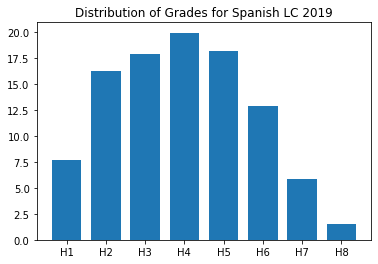

In [5]:
labels = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8']
means = [7.7, 16.2, 17.9, 19.9, 18.1, 12.9, 5.8, 1.5]
x = np.arange(len(labels))
width = 0.75

ax = plt.subplot()
rects = ax.bar(x, means, width)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title("Distribution of Grades for Spanish LC 2019")

plt.show()


I had to determine how to create a normally distributed data set between the values 1-8 in order to generate my data for the grades variable.  To do this I used the fuction below from SciPy Stats which generates a normally distributed array from values within a defined range [4].   

In [7]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

Below is the code used to generate the results for the 135 students. The mean grade is set at 4 and the standard deviation set to 1.75 as this best represented the results obtained nationally the prior year [6]. 

In [62]:
x = get_truncated_normal(4, 1.75, 1, 8)
results = x.rvs(135)

In [63]:
results = np.round(results, 0)
#results= results.astype(int) 
results = sorted(results, reverse=True)
results = np.array(results)
results= results.astype(int) 
results = np.array(results)

In [64]:
def CountFrequency(mylist):      #Counted the frequency for each grade which was then plotted
    freq = {} 
    for item in mylist: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq
resultsfreq = CountFrequency(results)
resultsfreq

{8: 4, 7: 6, 6: 24, 5: 24, 4: 28, 3: 27, 2: 19, 1: 3}

In [65]:
results1 = list(resultsfreq.values())
results1.reverse() # ordering the results from highest to lowest
results1

[3, 19, 27, 28, 24, 24, 6, 4]

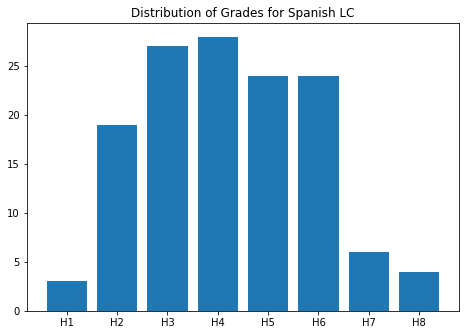

In [70]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
grades = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8']
ax.bar(grades, results1)
ax.set_title("Distribution of Grades for Spanish LC")
plt.show()

The percentages of each grade obtained by the students is similar to those obtained nationwide for the Leaving Certificate in 2019, suggesting that my data set closely replicates the distribution of grades to that observed in real-life.

Distribution of grades obtained in 2019: H1= 7.7%, H2= 16.2%, H3= 17.9%, H4= 19.9%, H5= 18.1%, H6= 12.9%, H7= 5.8% and H8= 1.5%.

In [68]:
percentages = []
for x in results1:
    x = x/135*100
    percentages.append(x)
percentages

[2.2222222222222223,
 14.074074074074074,
 20.0,
 20.74074074074074,
 17.77777777777778,
 17.77777777777778,
 4.444444444444445,
 2.9629629629629632]

The distribution of sex in secondary schools in Ireland is roughly equal with 27,698 boys and 28,373 girls sitting their leaving cert exams in 2019.  However it seems that more girls pick Spanish as a leaving certificate subject as 3,350 girls did the Spanish exam in 2019 compared to 2,296 boys [5].  I have replicated this uneven distribution in my data by using NumPy choice to set the probability in favour of a higher number of girls, the probability for 0 representing boys is 0.4 and 0.6 for 1 which I used to represent girls.

In [75]:
sex = rng.choice(2, 135, p=[0.4, 0.6])
sex= sex.astype(int)
sex = np.array(sex)
sex

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1])

The average number of teaching days lost due to school absences is 7.9% which is roughly 13 absent days per student per school year [7].  This roughly follows a normal distribution however as it is impossible to have a negative number in this dataset I have to use a while loop and if statement when generating my array with NumPy to ensure there were no negative values. 

In [76]:
absent = []
while len(absent) <= 134:
    x = rng.normal(13, 8)
    if x >= 0:
        absent.append(x)
absent= np.array(absent)
absent= absent.astype(int)
absent.sort()
absent

array([ 0,  1,  1,  1,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  8,  8,  8,
        8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 21, 21, 21, 21, 21, 22, 24, 24, 24, 25, 25, 28, 28, 30, 34])

The mean value for my data set matches the average number of school absences per student observed in the real world.

In [77]:
np.random.shuffle(absent)  # shuffling the array so they are randomly 
absent= absent.astype(int)  # distributed through the data set
absent = np.array(absent)
np.mean(absent)

12.777777777777779

The average number of hours studied per week outside of school hours by students is 5 with a standard deviation of 1.5 hours.  The distribution also follows a normal distribution.  The reason behind using these figures was anecdotal evidence from my sister as she asked her students for me. 

In [85]:
# again like with absences there can't be negative values so using the same
# code to generate a normal distribution with only positive integers
hours = []
while len(hours) <= 134:
    x = rng.normal(5, 1.5)
    if x >= 0:
        hours.append(x)
hours= np.array(hours)
hours= hours.astype(int)
hours.sort()
hours= np.array(hours)
hours

array([0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8,
       8, 8, 9])

In [174]:
# Creating student numbers
student = list(range(1, 136))
student
student = rng.permutation(student)
print(student)

[ 16 107 113 118  87 130  79  73  95  84  99  14  51  78 126 134 124   1
  28  74   8  40  69  50  94  66  80 120 109  13  75  77  68  34  18 119
  86  62  64  17  44  55 105 125  12  92  59  93  53  47  88 132  37  96
  21 103 133  42  30  57 100  70  23  45  41 128  27  83 115 104 111  82
  52 106 131 101  71  24  63  81  35  76  60  85 135  72  10   3   7  49
 121  20 116 110  36  33 123  15  65   6   9  19 112  22  11  46   4   2
  48  32 122  56  91 102 127  90  67  97 117 129   5  98  38  31  43  39
 108  58  25  54  29 114  61  26  89]


In [175]:
#Joining the separate arrays into a single array
my_array = np.stack((student, results, sex, absent, hours), axis=1)
my_array

array([[ 16,   8,   1,  12,   0],
       [107,   8,   0,  18,   0],
       [113,   8,   1,  14,   1],
       [118,   8,   1,   1,   1],
       [ 87,   7,   0,   7,   1],
       [130,   7,   1,   9,   2],
       [ 79,   7,   1,  10,   2],
       [ 73,   7,   1,  12,   2],
       [ 95,   7,   0,  12,   2],
       [ 84,   7,   1,  19,   2],
       [ 99,   6,   1,  21,   2],
       [ 14,   6,   1,   1,   2],
       [ 51,   6,   0,   4,   3],
       [ 78,   6,   0,   9,   3],
       [126,   6,   0,  10,   3],
       [134,   6,   1,  10,   3],
       [124,   6,   1,  11,   3],
       [  1,   6,   0,  11,   3],
       [ 28,   6,   0,  13,   3],
       [ 74,   6,   1,  19,   3],
       [  8,   6,   0,  24,   3],
       [ 40,   6,   1,  28,   3],
       [ 69,   6,   0,   1,   3],
       [ 50,   6,   1,   5,   3],
       [ 94,   6,   1,   6,   3],
       [ 66,   6,   0,   6,   3],
       [ 80,   6,   1,   6,   3],
       [120,   6,   1,  12,   3],
       [109,   6,   1,  14,   3],
       [ 13,  

In [176]:
#Converting the dataset into a Pandas dataframe
df = pd.DataFrame(my_array, columns = ['Student', 'Results', 'Sex', 'Absent', 'Hours'])
df

,Student,Results,Sex,Absent,Hours
0,16,8,1,12,0
1,107,8,0,18,0
2,113,8,1,14,1
3,118,8,1,1,1
4,87,7,0,7,1
...,...,...,...,...,...
130,29,2,0,20,8
131,114,2,0,13,8
132,61,1,0,8,8
133,26,1,0,17,8


In [177]:
# Sorted dataset
df = df.sort_values(by=['Results', 'Sex', 'Absent', 'Hours'])
df

,Student,Results,Sex,Absent,Hours
132,61,1,0,8,8
133,26,1,0,17,8
134,89,1,1,20,9
113,102,2,0,3,6
127,58,2,0,7,7
...,...,...,...,...,...
9,84,7,1,19,2
1,107,8,0,18,0
3,118,8,1,1,1
0,16,8,1,12,0


## Analysis
___

In [182]:
df['Sex'].replace({0:'male', 1:'female'}, inplace=True)

In [183]:
df['Sex'].value_counts()

female    83
male      52
Name: Sex, dtype: int64

In [179]:
# Data of just female students
female = df[df['Sex']==1]
female

,Student,Results,Sex,Absent,Hours
134,89,1,1,20,9
114,127,2,1,5,6
115,90,2,1,5,6
125,39,2,1,9,7
116,67,2,1,10,6
...,...,...,...,...,...
7,73,7,1,12,2
9,84,7,1,19,2
3,118,8,1,1,1
0,16,8,1,12,0


In [180]:
# counting the number of each grade received by female students
f_results = female['Results'].value_counts(sort = False, ascending = True)
f_results

1     1
2    11
3    16
4    17
5    16
6    15
7     4
8     3
Name: Results, dtype: int64

In [101]:
f_results= np.array(f_results)
f_results

Calculating the percentage of females receiving each grade.

In [126]:
for x in f_results:
    x = x/83*100
    print(x)

1.2048192771084338
13.253012048192772
19.27710843373494
20.481927710843372
19.27710843373494
18.072289156626507
4.819277108433735
3.614457831325301


In [181]:
# Data of male students
male = df[df['Sex']==0]
male

,Student,Results,Sex,Absent,Hours
132,61,1,0,8,8
133,26,1,0,17,8
113,102,2,0,3,6
127,58,2,0,7,7
117,97,2,0,12,6
118,117,2,0,12,6
131,114,2,0,13,8
120,5,2,0,15,6
129,54,2,0,19,7
130,29,2,0,20,8


In [128]:
# counting the number of each grade received by male students
m_results = male['Results'].value_counts(sort = False, ascending = True)

In [129]:
m_results= np.array(m_results)
m_results

array([ 2,  8, 11, 11,  8,  9,  2,  1], dtype=int64)

In [131]:
for x in m_results:
    x = x/52*100
    print(x)

3.8461538461538463
15.384615384615385
21.153846153846153
21.153846153846153
15.384615384615385
17.307692307692307
3.8461538461538463
1.9230769230769231


Below is a T-test analysing if there is a difference in grades between the males and females as well as a graph of the distribution of grades separated by sex. 

In [191]:
stats.ttest_ind(df['Results'][df['Sex']=='male'],
               df['Results'][df['Sex']=='female'])

Ttest_indResult(statistic=-1.0057449998885406, pvalue=0.31636454440091444)

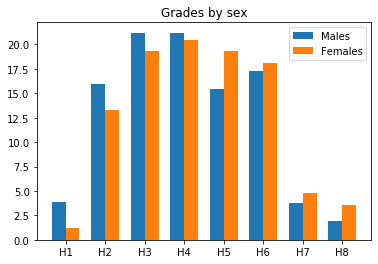

In [161]:
labels = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8']
males = [3.9, 15.9, 21.2, 21.2, 15.4, 17.3, 3.8, 1.9]           #these figures are the % distribution of 
females = [1.2, 13.3, 19.3, 20.5, 19.3, 18.1, 4.8, 3.6]         # grades for males and females

ind = np.arange(len(males))
width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(ind-width/2, males, width, label='Males')
rects2 = ax.bar(ind+width/2, females, width, label='Females')

ax.set_title('Grades by sex')
ax.set_xticks(ind)
ax.set_xticklabels(('H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8'))

ax.legend()

plt.show()

On average males and females spent the same number of hours studying outside of school hours.

In [192]:
stats.ttest_ind(df['Hours'][df['Sex']=='male'],
               df['Hours'][df['Sex']=='female'])

Ttest_indResult(statistic=0.7318104333330308, pvalue=0.46557180213257476)

In [165]:
df.groupby('Sex').agg({"Hours": "mean"})

,Hours
Sex,
0,4.596154
1,4.385542


We can see a correlation between results and number of hours study performed.  As would be expected, students who spent more time studying outside of school hours received better grades compared to those who studied less.

In [198]:
df.groupby('Results').agg({"Hours": "mean"})

,Hours
Results,
1,8.333333
2,6.578947
3,5.444444
4,4.607143
5,3.916667
6,2.916667
7,1.833333
8,0.500000


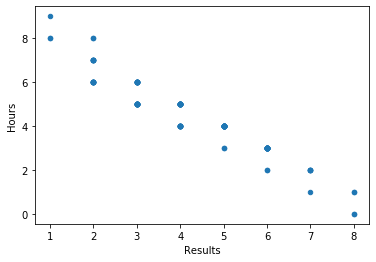

In [166]:
df.plot.scatter(x = 'Results', y = 'Hours')

There seemed to be no apparent correlation between the number of absences from school and the grade received.

In [219]:
df.groupby('Results').agg({"Absent": "mean"})

,Absent
Results,
1,7.000000
2,13.384615
3,9.800000
4,12.909091
5,10.482759
6,14.545455
7,12.500000
8,20.000000


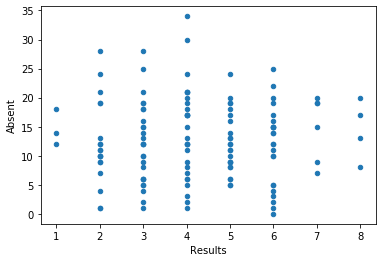

In [173]:
df.plot.scatter(x = 'Results', y = 'Absent')

In conclusion, two out of the three factors I examined appeared to have an impact on the grade received by students in their Leaving Certificate Spanish exam.  The first factor I looked at was sex and boys tended to perform slightly better compared to girls.  The second was the number of hours spent studying and as was expected there was a positive correlation between this and the grade received with those studying more achieving a higher result.  Lastly, the number of absences appeared to have to affect on the result achieved in the exam. 

I believe my dataset closely resembled that which would be observed in the real-world and my analysis matches the actual relationships between the factors.

### References

[1]. http://transition.ie/files/2015/Full%20Details%20-%20Revised%20Common%20Points%20Scale.pdf

[2]. https://en.wikipedia.org/wiki/Continuous_or_discrete_variable

[3]. https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-numerical-variables/

[4]. https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.truncnorm.html

[5]. Women and Men in Ireland 2019, https://www.cso.ie/en/releasesandpublications/ep/p-wamii/womenandmeninireland2019/education/

[6]. State Examinitions Commission, https://www.examinations.ie/statistics/?l=en&mc=st&sc=r19

[7]. TUSLA, School Attendance Data from Primary and Post-Primary Schools